In [158]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('C:/Users/yakul/mutipage/data/year.csv')

In [160]:
df


,Date,Sale
0,31-Dec-07,1285000
1,31-Dec-08,1360000
2,31-Dec-09,1320000
3,31-Dec-10,1450060
4,31-Dec-11,1315200
5,31-Dec-12,1545000
6,31-Dec-13,1356700
7,31-Dec-14,1435850
8,31-Dec-15,1456280
9,31-Dec-16,1405800


In [161]:
df.shape

(15, 2)

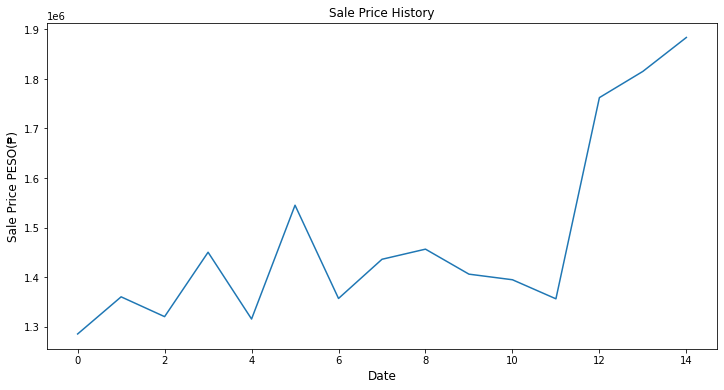

In [162]:
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(df['Sale'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.show()

In [163]:
data = df.filter(['Sale'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .7)
training_data_len

11

In [164]:
ma3 = df.Sale.rolling(3).mean()
ma3

0              NaN
1              NaN
2     1.321667e+06
3     1.376687e+06
4     1.361753e+06
5     1.436753e+06
6     1.405633e+06
7     1.445850e+06
8     1.416277e+06
9     1.432643e+06
10    1.418860e+06
11    1.385433e+06
12    1.504267e+06
13    1.644525e+06
14    1.820448e+06
Name: Sale, dtype: float64

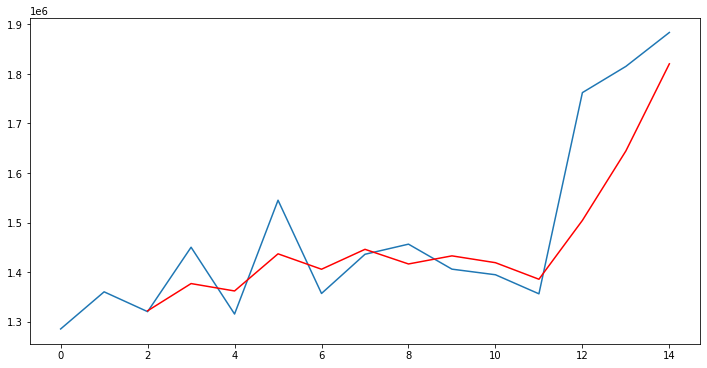

In [165]:

plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma3, "r")

In [166]:
ma6 = df.Sale.rolling(6).mean()
ma6

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5     1.379210e+06
6     1.391160e+06
7     1.403802e+06
8     1.426515e+06
9     1.419138e+06
10    1.432355e+06
11    1.400855e+06
12    1.468455e+06
13    1.531692e+06
14    1.602941e+06
Name: Sale, dtype: float64

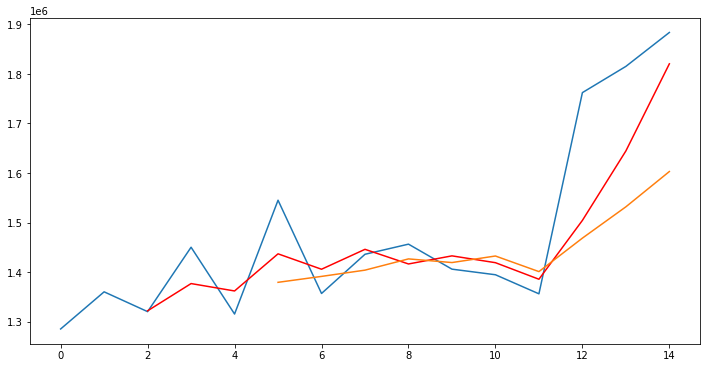

In [167]:

plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma3, "r")
plt.plot(ma6)

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.12525678],
       [0.05845316],
       [0.27566511],
       [0.05043673],
       [0.43422349],
       [0.11974548],
       [0.25193313],
       [0.28605308],
       [0.20174691],
       [0.18287489],
       [0.11857641],
       [0.79713412],
       [0.88560716],
       [1.        ]])

In [169]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(3, len(train_data)):
  x_train.append(train_data[i-3:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 3:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.12525678, 0.05845316])]
[0.27566511348263933]



In [170]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [171]:
x_train.shape

(8, 3)

In [172]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8, 3, 1)

In [173]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [174]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [175]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [176]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 50)             10400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 25)                1275      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [177]:
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
8/8 [==============================] - 15s 18ms/step - loss: 0.0459
Epoch 2/4
8/8 [==============================] - 0s 13ms/step - loss: 0.0198
Epoch 3/4
8/8 [==============================] - 0s 12ms/step - loss: 0.0126
Epoch 4/4
8/8 [==============================] - 0s 13ms/step - loss: 0.0143


In [178]:
test_data = scaled_data[training_data_len -3: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(3, len(test_data)):
  x_test.append(test_data[i -3:i, 0])

In [179]:
x_test = np.array(x_test)

In [180]:
x_test.shape

(4, 3)

In [181]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [182]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 2s 2s/step


In [183]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

263943.0

C:\Users\yakul\AppData\Local\Temp\ipykernel_11724\2875159218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Predictions'] = predictions


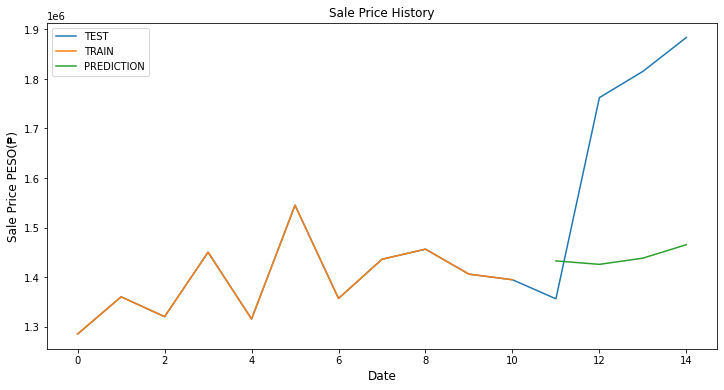

In [184]:
train = data[:training_data_len]
prediction = data[training_data_len:]
prediction['Predictions'] = predictions
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(data)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.plot(train['Sale'])
plt.plot(prediction[[ 'Predictions']])
plt.legend(['TEST','TRAIN','PREDICTION'], loc = 'upper left')
plt.show()


In [186]:
year = pd.read_csv('C:/Users/yakul/mutipage/data/year.csv')
newdf = year.filter(['Sale'])
last_3_years = newdf[-3:].values
last_3_years_scaled = scaler.transform(last_3_years)
X_test = [] 
X_test.append(last_3_years)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_sale = model.predict(X_test)
pred_sale = scaler.inverse_transform(pred_sale)
print(pred_sale)

1/1 [==============================] - 0s 36ms/step
[[1682353.4]]
